In [34]:
from include.TriggerPrimitive import TriggerPrimitive as TriggerPrimitive
from include.TPFinder import TPFinder as TPFinder
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#load waveform data (100 low energy electron events, 5 - 100 MeV)
col = np.loadtxt("data/PedSubWaveform_Collection_Dump.txt")
ind = np.loadtxt("data/PedSubWaveform_Induction_Dump.txt")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/virgolaema/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_94722/2095546303.py", line 13, in <module>
    hits = TPFinder(ADCS, threshold)
  File "/home/virgolaema/dune/tp-generator/include/TPFinder.py", line 9, in TPFinder
NameError: name 'TriggerPrimitive' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/virgolaema/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/virgolaema/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/virgolaema/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1326, in struct

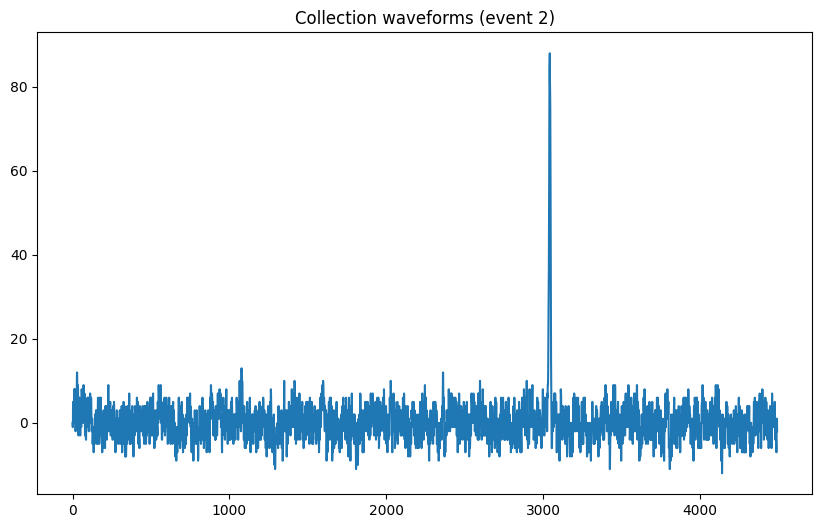

In [36]:
event = 2
threshold = 30

#plot collection waveforms from event
plt.figure(figsize = (10,6))
offset = 0
for data in col:
    if (data[0]==event):
        ADCS = data[2:]
        plt.title("Collection waveforms (event %.0f)" %event)
        plt.plot(ADCS + offset)#offset by channel number
       
        hits = TPFinder(ADCS, threshold)
        for hit in hits:
            plt.plot(hit.time_start,hit.adc_peak + offset,'o')
           
        plt.text(len(ADCS) + 100, offset, 'channel : %.0f' %data[1])
        offset+=100
        plt.ylabel("Offset Amplitude [ADC]")
        plt.xlabel("Time [ticks]")
plt.show()

#plot induction waveforms for event
plt.figure(figsize = (10,6))
for data in ind:
    if (data[0]==event):
        ADCS = data[2:]
        plt.title("Induction waveforms (event %.0f)" %event)
        plt.plot(ADCS + offset)#offset by channel number
        plt.text(len(ADCS) + 100, offset, 'channel : %.0f' %data[1])
        offset+=100
        plt.ylabel("Offset Amplitude [ADC]")
        plt.xlabel("Time [ticks]")
plt.show()